# Loan Approval Prediction

The objective of this project is to utilize the applicant's information, including loan amount, tenure, cibil score, education, assets, and various other variables, to predict whether the bank will approve the loan. By conducting this analysis, we can identify the factors that influence loan approval and make predictions about the loan approval status for new applicants. Furthermore, this project will aid in offering priority services to customers who have a higher likelihood of having their loans approved.

### About the dataset

The dataset for loan approval comprises financial records and related information that are utilized to assess the eligibility of individuals or organizations for securing loans from a lending institution. It encompasses a range of factors, including cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is frequently employed in machine learning and data analysis to create models and algorithms that can forecast the probability of loan approval based on the provided features.

### Data Dictionary
| Variable | Description |
| --- | --- |
|loan_id | Unique loan ID|
|no_of_dependents | Number of dependents of the applicant|
|education | Education level of the applicant|
|self_employed | If the applicant is self-employed or not|
|income_annum | Annual income of the applicant|
|loan_amount | Loan amount requested by the applicant|
|loan_tenure | Tenure of the loan requested by the applicant (in Years)|
|cibil_score | CIBIL score of the applicant|
|residential_asset_value | Value of the residential asset of the applicant|
|commercial_asset_value | Value of the commercial asset of the applicant|
|luxury_asset_value | Value of the luxury asset of the applicant|
|bank_assets_value | Value of the bank asset of the applicant|
|loan_status | Status of the loan (Approved/Rejected)|

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import os
os.getcwd()
os.chdir("D:\python")

In [4]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


## Data Preprocessing

In [6]:
# Checking the shape of the dataset
df.shape

(4269, 13)

Removing the unnecessary load_id as it is an identifier column

In [7]:
df.drop(columns='loan_id', inplace=True)

In [8]:
# Checking for null/missing values
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
# Checking the data types of the columns
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

The dataset has 4 kinds of assests that are - Residential, Commericial, Luxury and Bank. Categorizing these assets into two category i.e. Movable and Immovable assets. The Residential and Commericial assest would be added to the Immovable assets and Luxury and Bank assets would be added to the Movable assets.

In [10]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [11]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

Descriptive Statistics

In [12]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [13]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [14]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,4100000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,12900000,7100000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,25400000,13600000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,19900000,8900000
4268,1,Graduate,No,9200000,29700000,10,607,Approved,47700000,29600000


## Exploratory Data Analysis

In the exploratory data analysis, looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. By visualizing the data, a comprehensive understanding of potential trends and patterns can be gained, as well as uncover hidden insights within the dataset.

#### Number of Dependents

Text(0.5, 1.0, 'No. of Dependents')

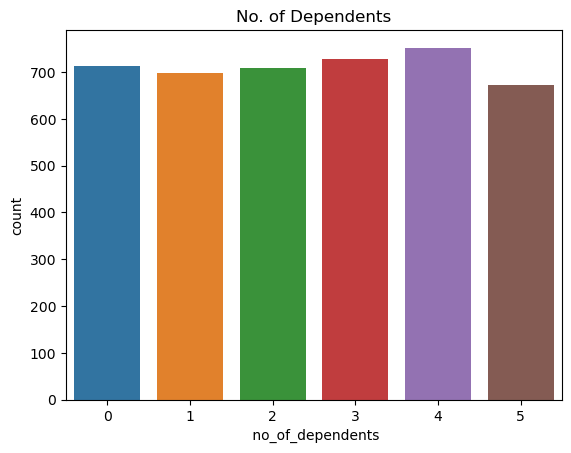

In [17]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('No. of Dependents')

This graph shows the number of dependent indivduals on the loan applicant. There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories. Since the number of dependents increases the disposable income of the applicant decreases. So it is assumed that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

#### Education and Income

<AxesSubplot:xlabel=' education', ylabel=' income_annum'>

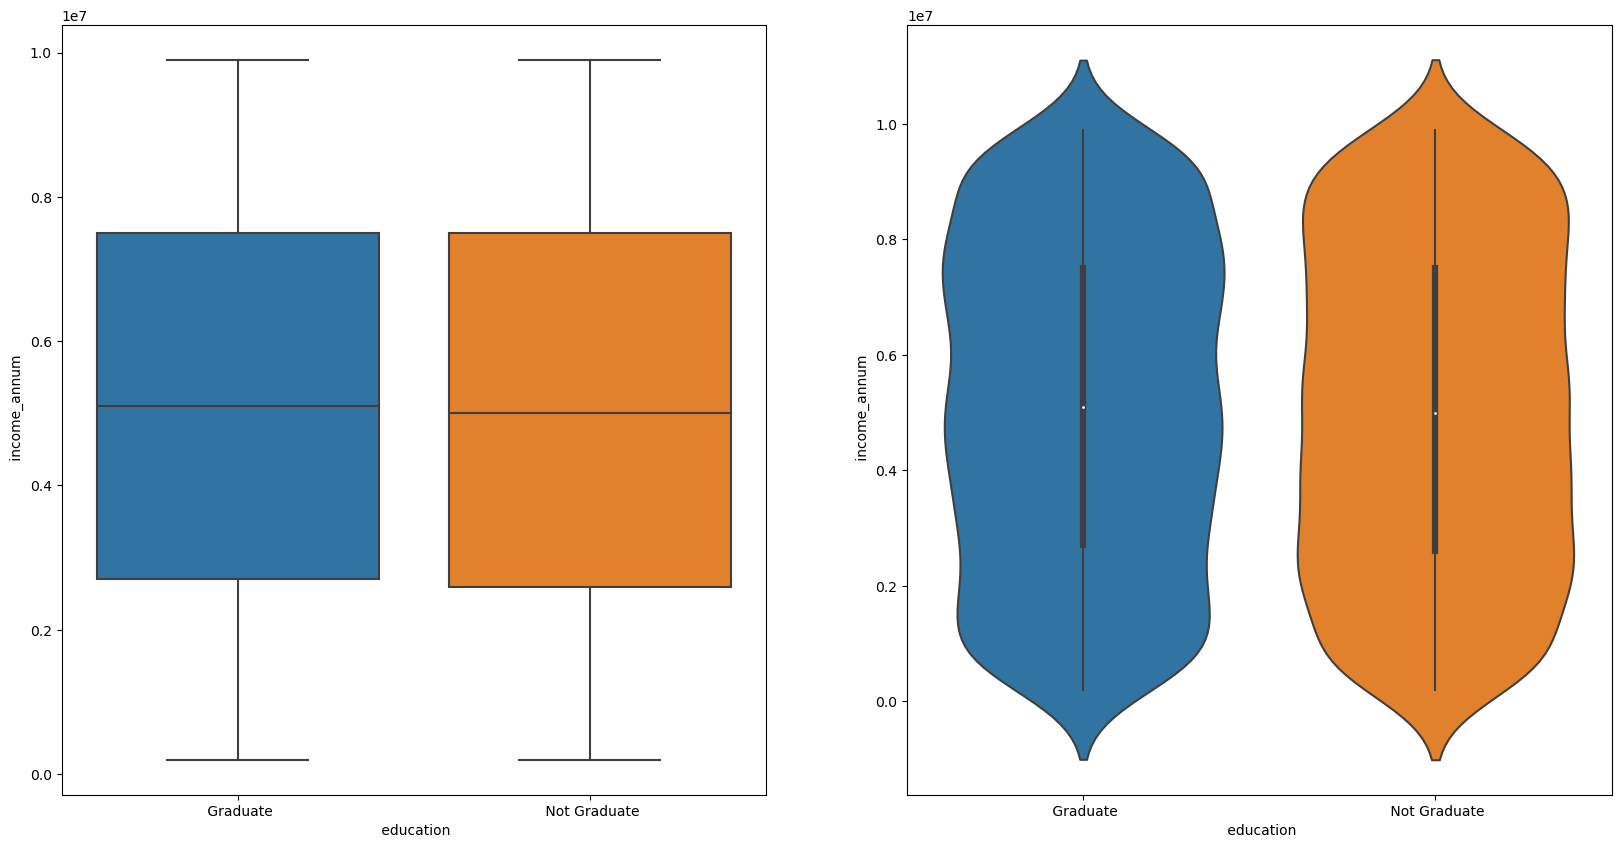

In [19]:
fig, ax = plt.subplots(1,2,figsize=(20, 10))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two visualizations, the boxplot and violinplot, illustrate the relationship between the education level of applicants and their annual income. The boxplot reveals an intriguing finding that both graduates and non-graduates have similar median incomes, with only a slight increase in income for graduates. Additionally, the violinplot depicts the income distribution among graduate and non-graduate applicants. It shows that non-graduates have a relatively even distribution of income between 2,000,000 and 8,000,000, whereas graduates display an uneven distribution, with more applicants earning between 6,000,000 and 8,000,000. Based on the minimal difference in annual income between graduates and non-graduates, I assume that education does not significantly impact loan approval.

#### Employment Status and Education

Text(0.5, 1.0, 'Self Employed')

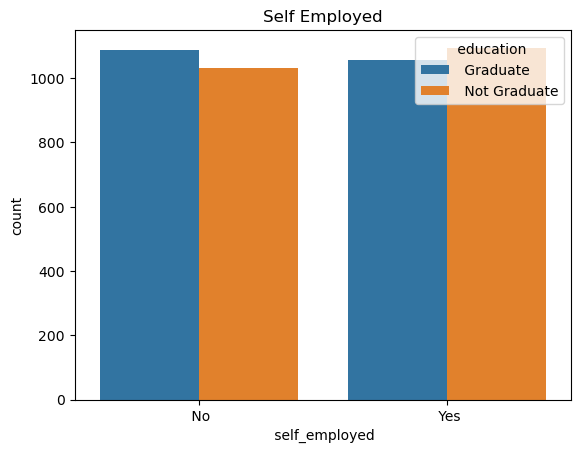

In [20]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

The graph illustrates the correlation between the education level of applicants and their employment status as self-employed individuals. In terms of education, the majority of graduate applicants are not self-employed, while the majority of non-graduates are self-employed. This suggests that graduate applicants are more likely to be employed as salaried workers, while non-graduates are more likely to be self-employed. This factor can potentially influence loan approval decisions since salaried employees generally have a more stable income and are thus more likely to repay the loan compared to self-employed applicants whose income may fluctuate. However, it is also possible that self-employed applicants earn more than salaried employees and therefore have a higher likelihood of loan repayment. Considering this factor is crucial when predicting loan approval outcomes.

#### Loan Amount and Tenure

Text(0.5, 1.0, 'Loan Amount vs Loan Term')

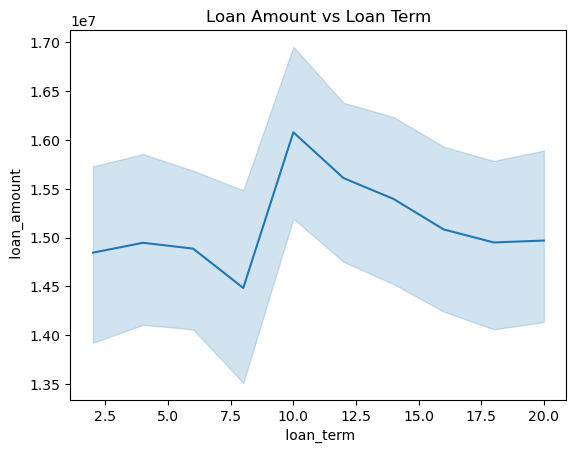

In [21]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs Loan Term')

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount  is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years. 

#### CIBIL Score Distribution

<AxesSubplot:xlabel=' cibil_score', ylabel='Count'>

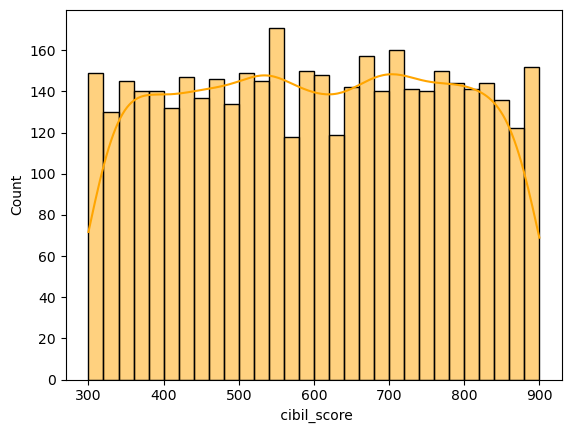

In [22]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'orange')

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.


|Cibil Score|Meaning|
|---|---|
|300-549|Poor|
|550-649|Fair|
|650-749|Good|
|750-799|Very Good|
|800-900|Excellent|

Source: [godigit.com](https://www.godigit.com/finance/credit-score/ranges-of-credit-score)

Referring to the table above that represents the quality of CIBIL scores, it can be observed that a significant portion of customers have a score below 649, which negatively impacts their loan applications. However, there are also a considerable number of applicants with a score above 649, which is a positive indicator for the bank. This presents an opportunity for the bank to target these customers and offer them priority services. Additionally, the bank can provide special offers and discounts to attract these customers and encourage them to choose the bank for their loan needs. Based on this observation, a hypothesis can be formulated that customers with a CIBIL score above 649 are more likely to have their loan applications approved.

#### Asset Distribution

<AxesSubplot:xlabel='Immovable_assets', ylabel='Count'>

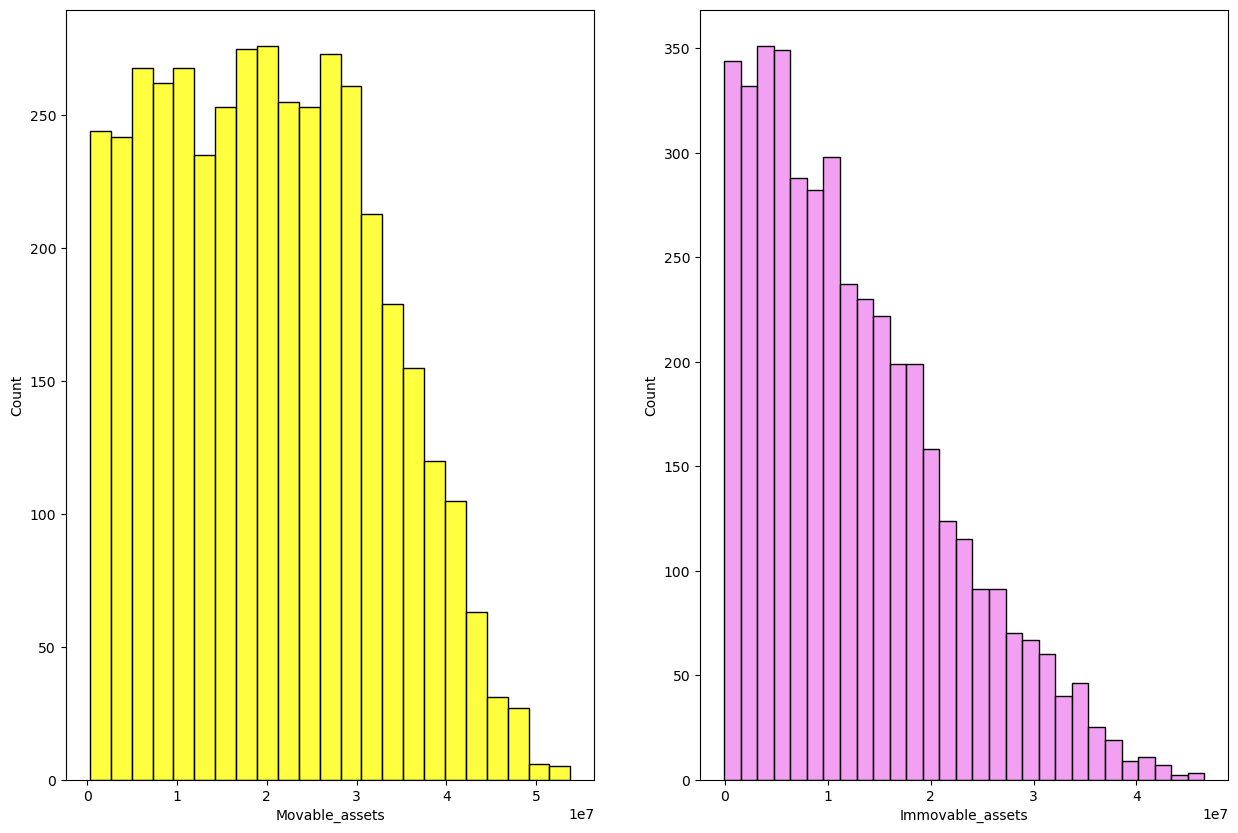

In [25]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.histplot(df['Movable_assets'], ax=ax[0], color='yellow')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='violet')

Assets play a significant role in loan applications as they provide security to the bank, assuring that the borrower will repay the loan. These assets can be categorized into movable and immovable assets. The provided graphs depict the distribution of these assets within the dataset.

When examining the movable assets, such as bank assets and luxury assets, it is evident that the majority of applicants possess less than 30 million in movable assets. Additionally, there is a slight downward trend in the number of applicants as the value of movable assets increases.

Turning to the immovable assets, including residential and commercial assets, it can be observed that most applicants have less than 15 million in immovable assets. Furthermore, there is a strong downward trend in the number of applicants as the value of immovable assets exceeds 20 million.

In summary, based on the data, it can be inferred that the majority of loan applicants have relatively lower values of both movable and immovable assets.

Till now in the EDA, I have explored the distribution of data across the various features as well as relationship between the some of the variables as well and made some assumptions and hypothesis. Now, in order to prove my assumptions and hypothesis I will be looking at the visualization of the relation between the independent variables and the target variable.

#### Number of Dependants Vs Loan Status

<AxesSubplot:xlabel=' no_of_dependents', ylabel='count'>

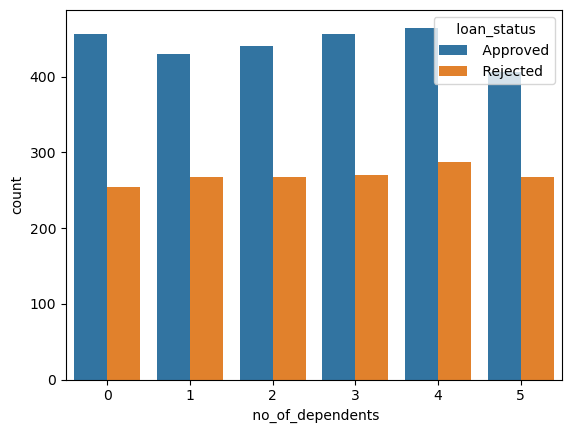

In [26]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

Regarding my hypothesis on loan approval based on the number of dependents, the results are mixed. Initially, the hypothesis held true in terms of the likelihood of loan rejections increasing with an increase in the number of dependents. However, the hypothesis was proven untrue when it came to loan approvals. According to the graph, there does not appear to be a significant change in the count of loan approvals with an increase in the number of dependents. Therefore, it can be concluded that my hypothesis regarding loan approval based on the number of dependents is not accurate.

#### Education Vs Loan Status

Text(0.5, 1.0, 'Loan Status by Education')

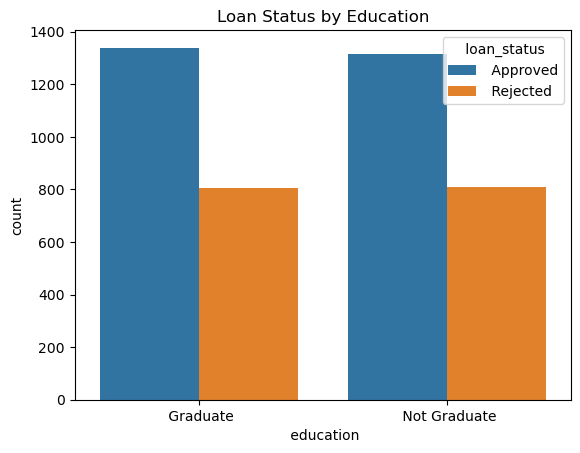

In [27]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

My hypothesis regarding the education not being factor in loan approval was right. The graph shows very minor difference between loan approval and rejection count for the graduate and non graduate applicants. The difference is not significant enough.

#### Annual Income vs Loan Status

<AxesSubplot:xlabel=' loan_status', ylabel=' income_annum'>

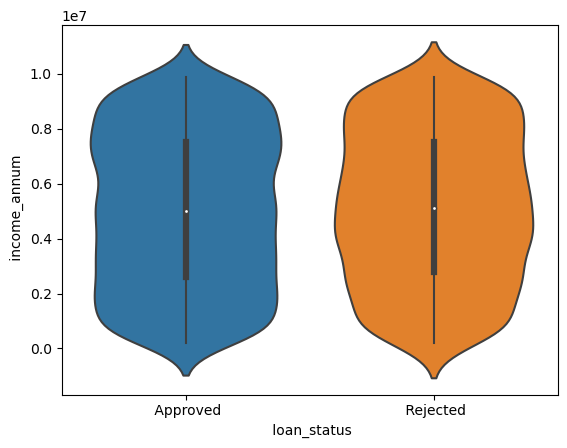

In [28]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

#### Loan amount & tenure Vs Loan Status

<AxesSubplot:xlabel=' loan_term', ylabel=' loan_amount'>

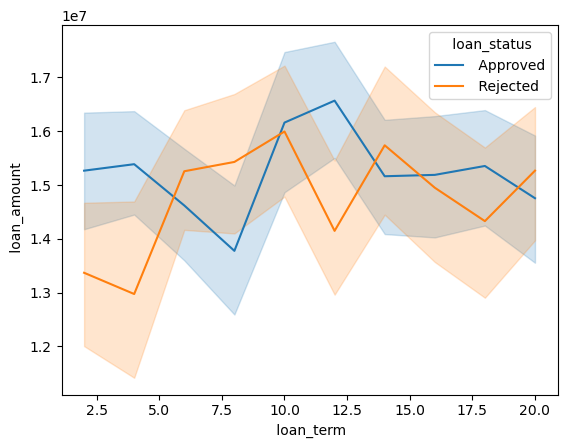

In [29]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph shows the relation between loan amount, loan tenure and loan status. Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

#### CIBIL Score Vs Loan Status

<AxesSubplot:xlabel=' loan_status', ylabel=' cibil_score'>

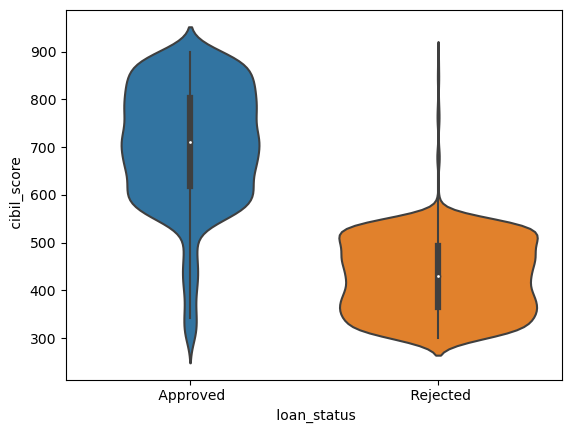

In [30]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

My hypothesis regarding the Cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.

#### Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

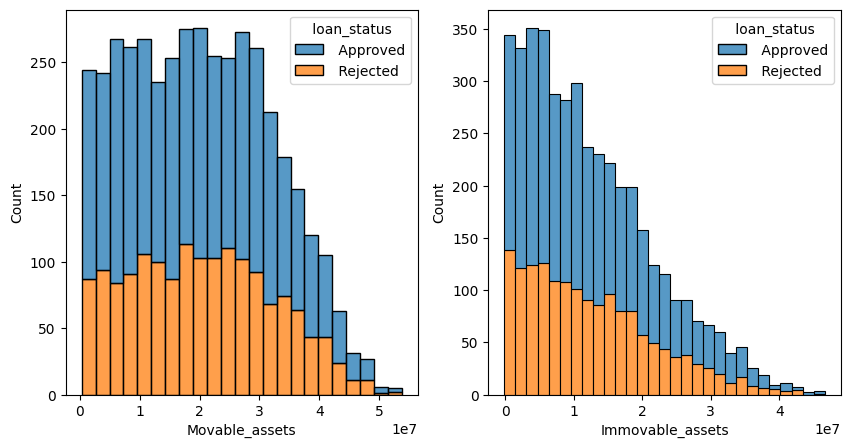

In [118]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the movable and immovable assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

## Data Preprocessing 2

#### Label Encoding the categorical variables

In [31]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [32]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [33]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
4264,5,1,1,1000000,2300000,12,317,0,4100000,3300000
4265,0,0,1,3300000,11300000,20,559,1,12900000,7100000
4266,2,0,0,6500000,23900000,18,457,0,25400000,13600000
4267,1,0,0,4100000,12800000,8,780,1,19900000,8900000
4268,1,1,0,9200000,29700000,10,607,1,47700000,29600000


## Coorelation Matrix Heatmap

<AxesSubplot:>

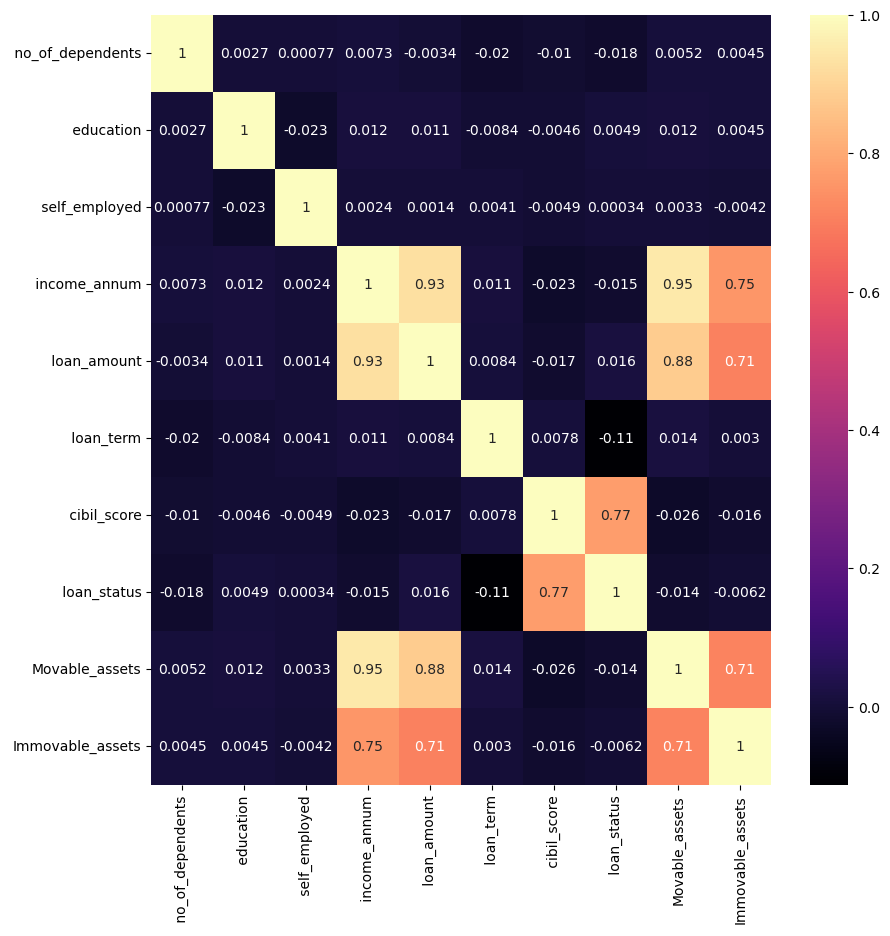

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='magma')

This correlation matrix heatmap has the folowing strong correlations:
1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The correlation between the movable and immovable assets is justified because both come under assets and its obvious that person with more movable assets will have more immovable assets and vice versa. Same is with Income and Movables and Immovale assets. The person with greater income will have greater assets.

Now, going to explore the correlation between Assets and Loan Amount, and also between Income and Loan Amount. The relation between the loan status and cibil score is already explored in the previous section.

#### Assets Vs Loan Amount

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

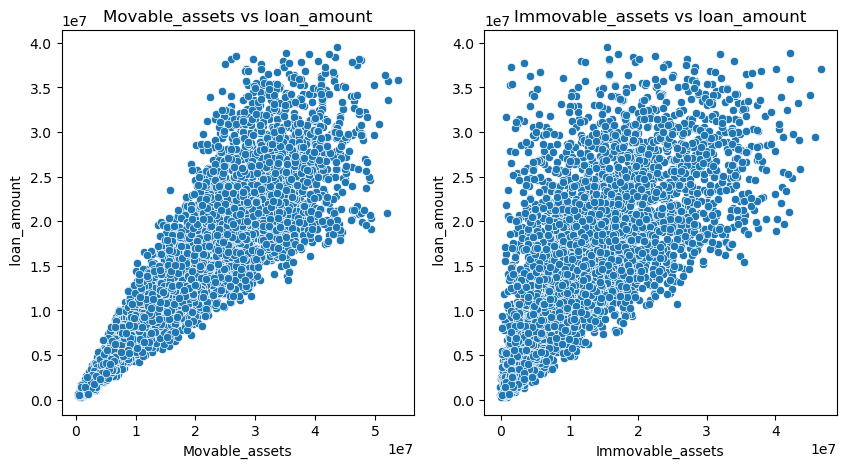

In [35]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

The loan amount has positive relation with movable and immovable assets. The more the assets, the more the loan amount issued by the bank.

#### Loan Amount Vs Income

<AxesSubplot:xlabel=' income_annum', ylabel=' loan_amount'>

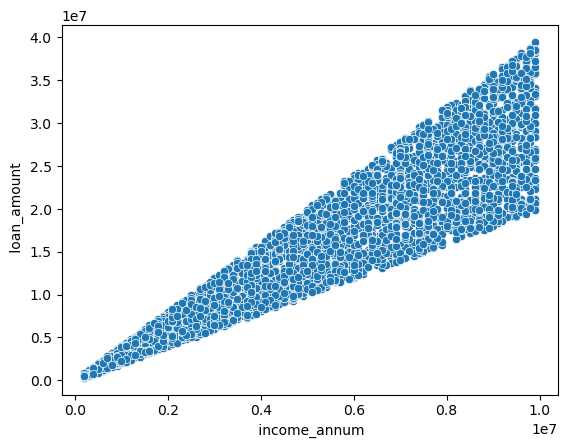

In [36]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## Model Building

The following machine learning models will be used to predcit the loan approval status:
1. Decision Tree Classifier
2. Random Forest Classifier

#### Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [39]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [41]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

#### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [43]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [45]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

## Model Evalution

#### Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

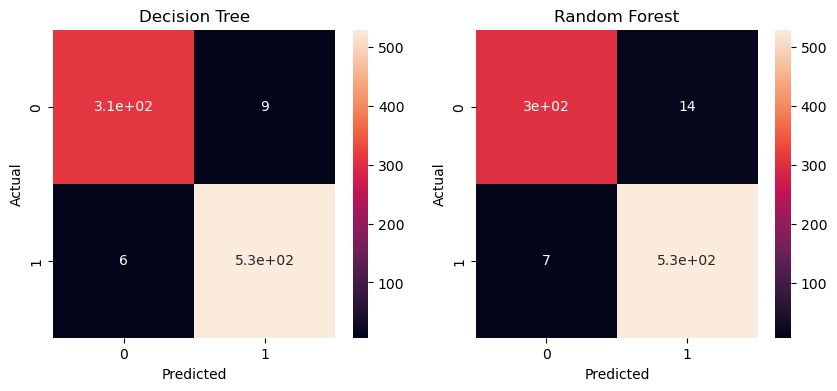

In [46]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The above confusion matrix heatmap visualizes the the true positive and true negative value counts in both the machine learning models. The decision tree classfier has only 17 false positve and negative valyes where has random forest classifier has 21 false postive and negative values. The decision tree classifier has a better accuracy compared to random forest classifier.

#### Distribution Plot

C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

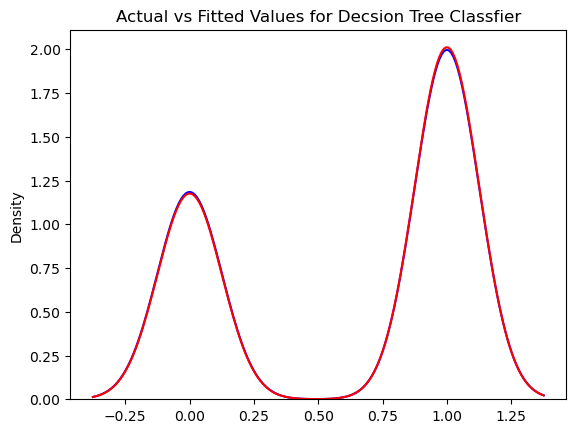

In [47]:
ax = sns.distplot( x = y_test, hist = False, color = "b", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "r", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SOUMOJIT CHATTERJEE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

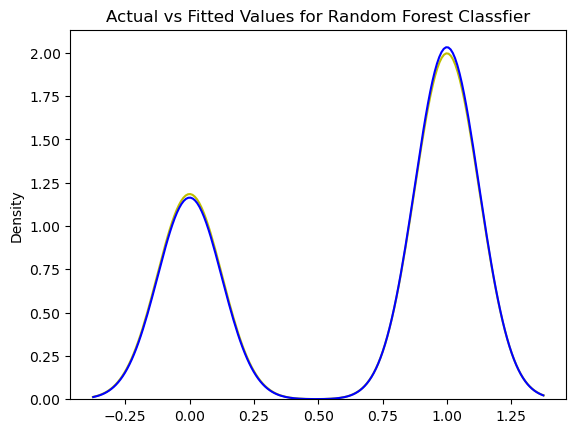

In [49]:
ax = sns.distplot( x = y_test, hist = False, color = "y", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

The distribution plots of both models exhibit a similar pattern. The predicted and actual values in the random forest classifier have a very slight difference in their distribution density. On the other hand, the distribution density of the predicted values in the decision tree classifier clearly overlaps with the actual values. Based on this observation, it can be concluded that the decision tree classifier is a superior model compared to the random forest classifier for this particular dataset.

#### Classification Report

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [51]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.9248451140523796
Mean Squared Error:  0.01756440281030445
Mean Absolute Error:  0.01756440281030445


R2 score:  0.8947831596733314
Mean Squared Error:  0.02459016393442623
Mean Absolute Error:  0.02459016393442623


From all the above metrics, graphs and reports, it can be concluded that descision tree classifier is a better machine learning model to predict the loan approval status of a person.

## Conclusion
From the exploratory data analysis, it can concluded that the following factors are important for the approval of loan:
- CIBIL Score: People with higher CIBIL score have higher chances of loan approval
- Number of Dependents: People with more number of dependents have less chances of loan approval
- Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
- Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval

Coming to the machine learning models, Decision Tree Classifier and Random Forest Classifier has been used. Both the models have given excellent results having accuracies - 91.4 % and 89.4 % repectively. But the decision tree classifier has yielded better results than the random forest classifier.